### 24 March 2025
### Thuto Wesley Sephai
### Deep Learning
### Assignment ANN

 Implement of an Artificial Neural Network (ANN) using TensorFlow and Keras for 
image classification on the Diabetes dataset. The assignment should include 
following steps: 

1. Loading and preprocessing the Diabetes dataset.
2. Defining the architecture of the ANN model, consisting of hidden layers and an 
output layer
3. Compiling the model with an appropriate loss function, optimizer, and evaluation 
metric
4. Training the model on the training data.
5. Evaluating the model's performance on the test data.   

In [43]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
# Loading Diabetes dataset
df = pd.read_csv('diabetes.csv')

Preprocess the Dataset finding the feature and target values

In [48]:
# Replacing the values that can't be zero
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    df[col] = df[col].replace(0, df[col].median())

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Defining the ANN Architecture

In [51]:
# import its libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(12, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

ImportError: Traceback (most recent call last):
  File "C:\Users\Thuto\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

Compiling the model with an appropriate loss function, optimizer, and evaluation 
metric 

In [ ]:
model.compile(
    loss='binary_crossentropy',     # Good for binary classification
    optimizer='adam',
    metrics=['accuracy']
)

 Training the model on the training data. 

In [57]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

NameError: name 'model' is not defined

Evaluating the model's performance on the test data

NameError: name 'history' is not defined

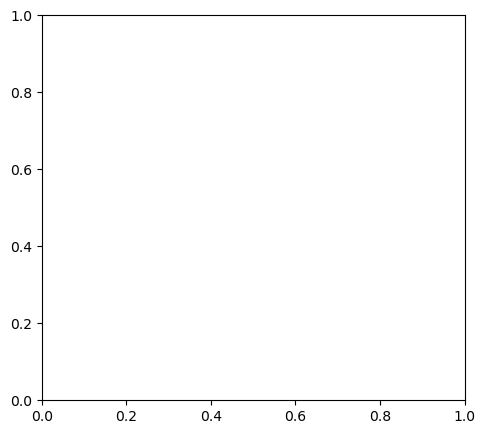

In [55]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()